In [85]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# Load and Inspect

In [2]:
path = '../../Data_Source/Social_Network_Ads.csv'
df = pd.read_csv(path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Encoding Features

In [5]:
le = LabelEncoder()

# Gender
df['Gender'] = le.fit_transform(df['Gender'])

# Feature Selection

In [6]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Train Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building

In [80]:
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
classifier.fit(X_train, y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Testing Score

In [81]:
y_pred = classifier.predict(X_test)

In [82]:
# accuracy
accuracy_score(y_test, y_pred)

0.9

In [83]:
# Classification 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        73
           1       0.93      0.81      0.86        47

    accuracy                           0.90       120
   macro avg       0.91      0.88      0.89       120
weighted avg       0.90      0.90      0.90       120



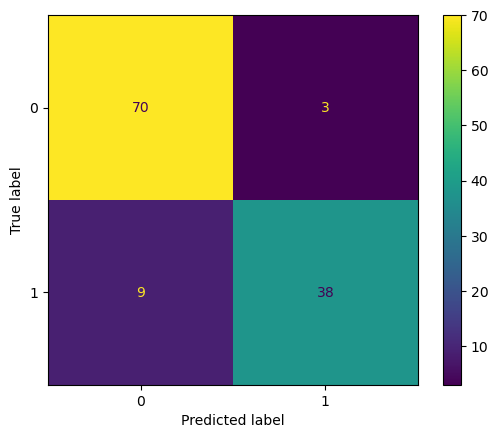

In [84]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred
)
plt.show()

# Tree Plot

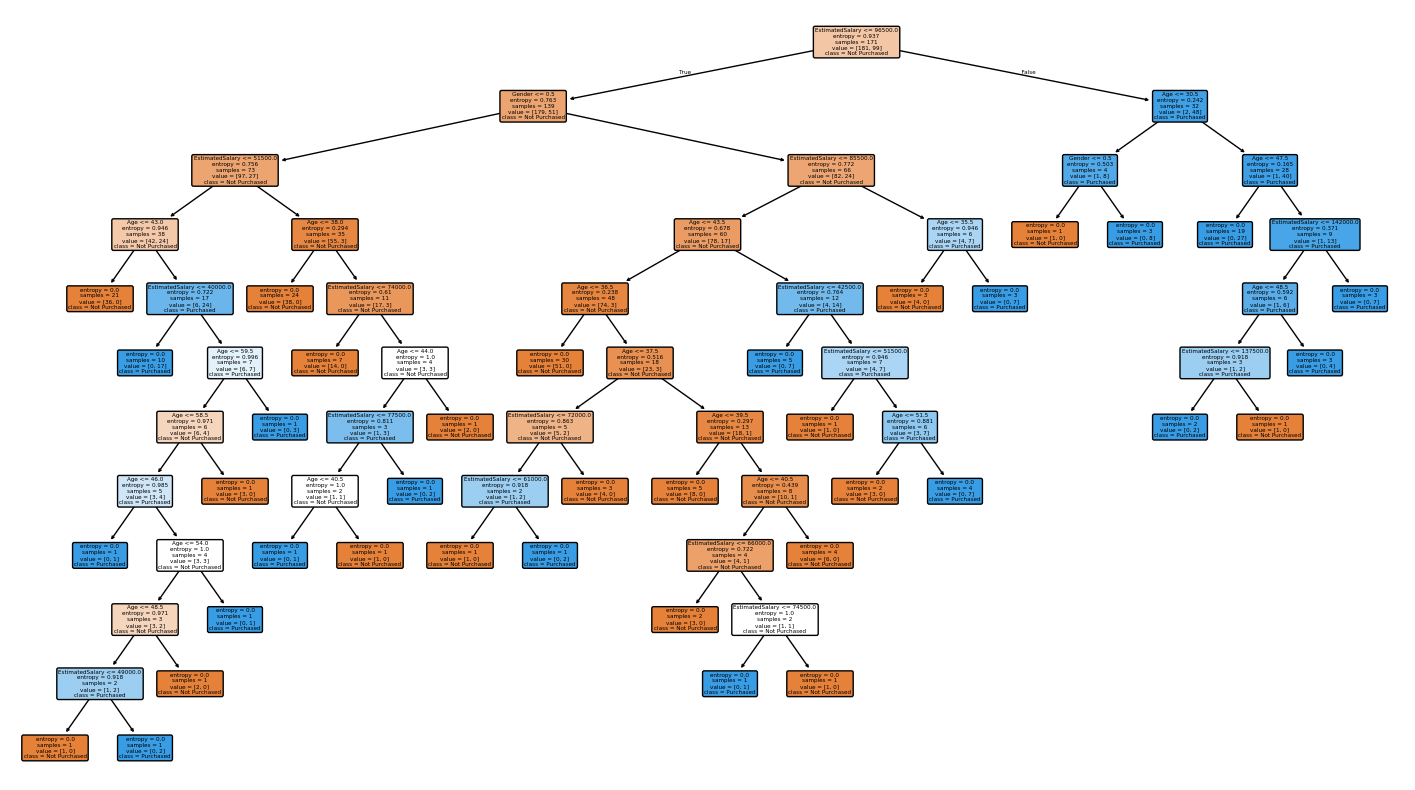

In [87]:
single_tree = classifier.estimators_[0] # first tree
plt.figure(figsize=(18, 10))
plot_tree(
    single_tree,
    feature_names=X.columns,
    class_names=['Not Purchased', 'Purchased'],
    filled=True,
    rounded=True
)
plt.show()